In [31]:
from keras.models import Sequential
from keras.layers import Dense
import ehtim as eh
import numpy as np

# visibilities
INPUT_SIZE = 1030
# pixels in image
OUTPUT_SIZE = 784

In [32]:
IM = eh.image.load_txt('../models/avery_sgra_eofn.txt');
IM = IM.resample_square(28)

def displayImage(arr):
    """Displays image given a flattened array of pixels."""
    IM.imvec = arr
    IM.display()

Loading text image:  ../models/avery_sgra_eofn.txt


In [34]:
def getData(start, end):
    """Reads in visibilities and image from [start, end)."""
    n = end - start
    x, y = np.empty([n, INPUT_SIZE]), np.empty([n, OUTPUT_SIZE])
    for i in range(n):
        obs = eh.obsdata.load_uvfits('inputs/obs{0}.fits'.format(start + i))
        im = eh.image.load_fits('outputs/img{0}.fits'.format(start + i))
        x[i] = obs.data['vis']
        y[i] = im.imvec
    return x, y

In [51]:
%%capture
x_train, y_train = getData(10000, 18000)

In [52]:
# save so don't have to reload every time
np.save('x_10000-18000.npy', x_train)
np.save('y_10000-18000.npy', y_train)

In [70]:
x_1 = np.load('x_0-10000.npy')
y_1 = np.load('y_0-10000.npy')
x_2 = np.load('x_10000-18000.npy')
y_2 = np.load('y_10000-18000.npy')

In [115]:
# Neural Net
model = Sequential()
model.add(Dense(900, input_dim=INPUT_SIZE, activation='sigmoid'))
#model.add(Dense(800, activation='sigmoid'))
model.add(Dense(OUTPUT_SIZE))
model.compile(loss='mse', optimizer='adam')
model.fit(x_train, y_train, epochs=50, batch_size=128, validation_split=0.3)

Train on 7000 samples, validate on 3000 samples
Epoch 1/50
7000/7000 [==============================] - 8s 1ms/step - loss: 0.0158 - val_loss: 1.4533e-04
Epoch 2/50
7000/7000 [==============================] - 4s 627us/step - loss: 4.2051e-05 - val_loss: 1.5092e-05
Epoch 3/50
7000/7000 [==============================] - 8s 1ms/step - loss: 1.3015e-05 - val_loss: 1.0439e-05
Epoch 4/50
7000/7000 [==============================] - 7s 987us/step - loss: 9.5559e-06 - val_loss: 7.9788e-06
Epoch 5/50
7000/7000 [==============================] - 4s 563us/step - loss: 7.4483e-06 - val_loss: 6.3547e-06
Epoch 6/50
7000/7000 [==============================] - 4s 563us/step - loss: 6.0372e-06 - val_loss: 5.2947e-06
Epoch 7/50
7000/7000 [==============================] - 4s 641us/step - loss: 5.0659e-06 - val_loss: 4.4830e-06
Epoch 8/50
7000/7000 [==============================] - 4s 604us/step - loss: 4.3505e-06 - val_loss: 3.8882e-06
Epoch 9/50
7000/7000 [==============================] - 4s 567us

In [106]:
%%capture
x_test, y_test = getData(10005, 10015)

0


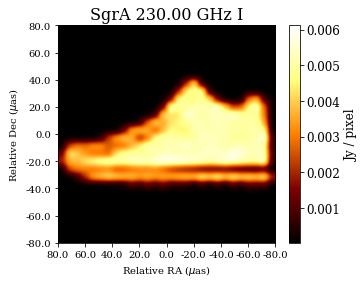

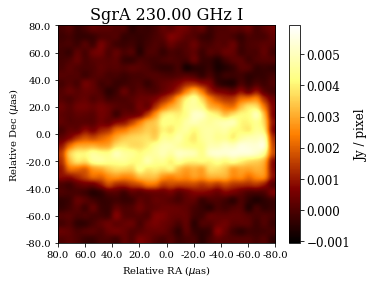

1


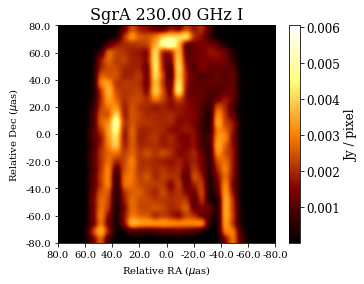

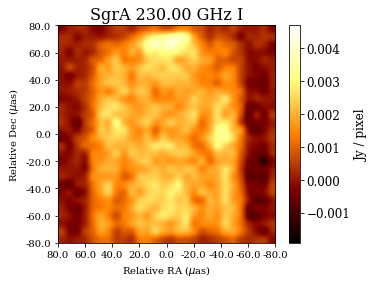

2


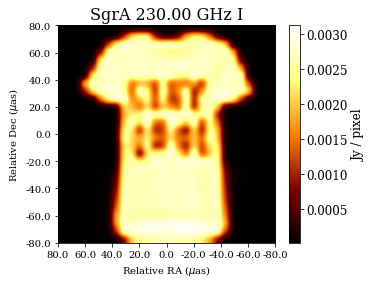

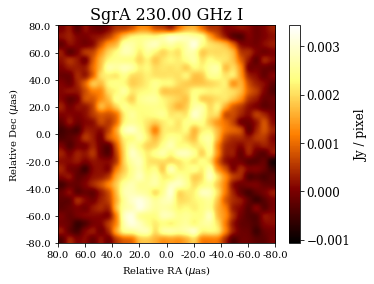

3


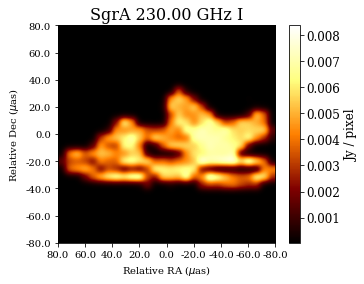

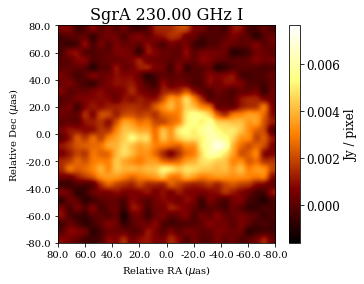

4


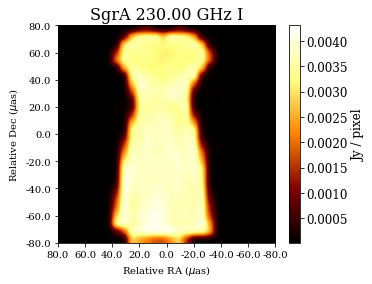

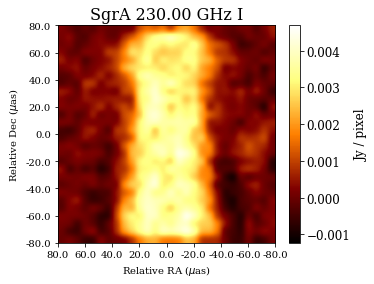

5


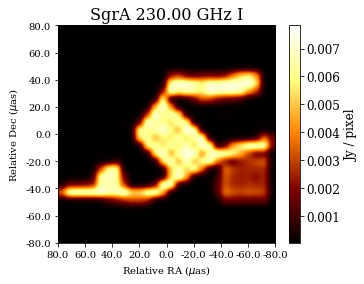

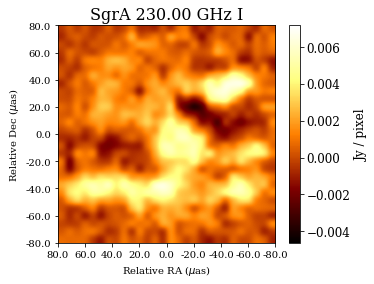

6


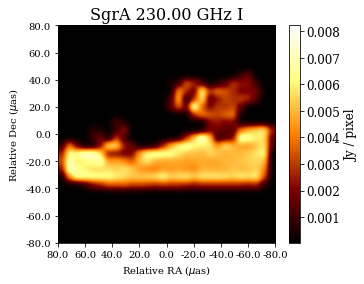

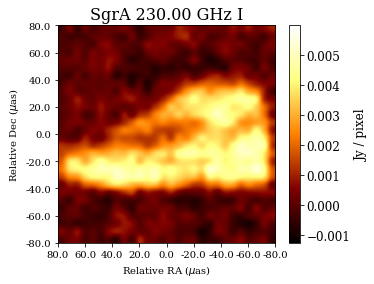

7


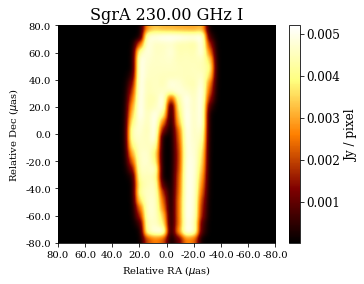

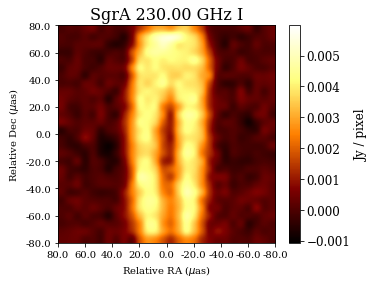

8


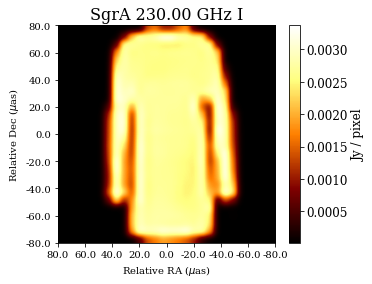

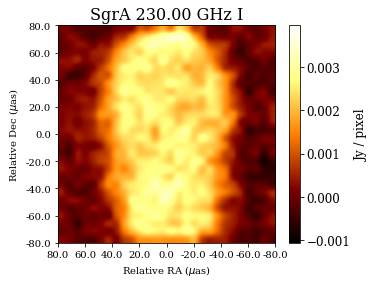

9


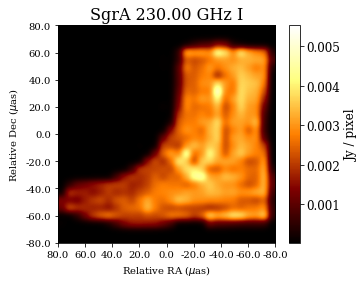

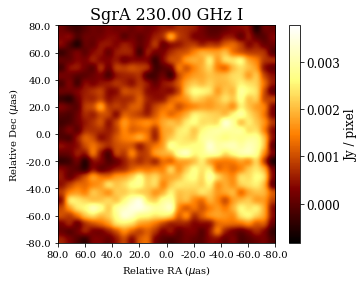

In [116]:
# Visualize predictions vs actual
y_predict = model.predict(x_test)
for i in range(10):
    print(i)
    displayImage(y_test[i])
    displayImage(y_predict[i])